In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score, roc_curve, classification_report
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import naive_bayes
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import pickle

In [2]:
pd.options.display.max_columns=160
pd.options.display.max_rows = 160

In [3]:
df = pd.read_pickle('table_from_aws.pkl')

In [4]:
df.head(5)

,county,less_than_high_school_diploma,at_least_high_school_diploma,at_least_bachelorss_degree,graduate_degree,school_enrollment,median_earnings_2010,white_not_latino_population,african_american_population,native_american_population,asian_american_population,other_race_or_races,latino_population,children_under_6_living_in_poverty,adults_65_and_older_living_in_poverty,total_population,preschool_enrollment_ratio_enrolled_ages_3_and_4,poverty_rate_below_federal_poverty_threshold,gini_coefficient,child_poverty_living_in_families_below_the_poverty_line,management_professional_and_related_occupations,service_occupations,sales_and_office_occupations,farming_fishing_and_forestry_occupations,construction_extraction_maintenance_and_repair_occupations,production_transportation_and_material_moving_occupations,sire_homogeneity,median_age,poor_physical_health_days,poor_mental_health_days,low_birthweight,teen_births,children_in_single_parent_households,adult_smoking,adult_obesity,diabetes,sexually_transmitted_infections,hiv_prevalence_rate,uninsured,unemployment,violent_crime,homicide_rate,injury_deaths,infant_mortality,result_2016,fips
0,"Lonoke County, Arkansas",14.2,85.8,16.6,4.9,75.45,28134.093970,88.0,6.35,0.50,0.75,1.45,3.00,23.65,12.95,65890,45.8,12.45,0.391,16.80,29.90,14.15,28.05,1.30,12.20,14.35,0.779624,35.3,3.3,3.900000,0.08,47.1,0.271,0.206,0.312,0.108,317.3,57.3,0.165,0.061,390.71,4.240000,71.1,6.800,1,05085
1,"Monroe County, Arkansas",31.4,68.6,12.3,3.7,80.25,20974.931745,56.8,39.90,0.50,0.95,0.55,1.30,44.00,23.55,8377,52.0,22.65,0.470,28.80,24.20,18.15,23.00,5.75,6.85,22.15,0.482139,43.2,5.3,4.281429,0.12,70.7,0.530,0.368,0.351,0.141,1572.8,345.1,0.200,0.084,202.77,9.861842,112.9,8.820,1,05095
2,"Drew County, Arkansas",19.4,80.6,19.4,5.7,78.50,21988.947300,67.9,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,4.5,4.700000,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,9.861842,82.0,8.820,1,05043
3,"Madison County, Arkansas",24.2,75.8,13.4,4.1,76.40,23365.948890,92.0,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849005,38.5,4.9,2.100000,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,9.861842,96.8,8.820,1,05087
4,"Jasper County, Georgia",21.7,78.3,13.3,5.6,70.20,25363.060950,72.7,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,4.3,3.700000,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,6.990811,71.6,9.172,1,13159


In [5]:
# Set up test / train split, stratitify y
y = df["result_2016"]
X = df.iloc[:,1:44]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify = y)
ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)

## Model 1 - KNN

In [6]:
# Model #1 -  let's start with KNN where n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_train_scaled)
print("The accuracy for the training set is: ", str(knn.score(X_train_scaled, y_train)))
print("The accuracy for the test set is: ", str(knn.score(X_test_scaled, y_test)))

The accuracy for the training set is:  0.9545245751033532
The accuracy for the test set is:  0.9218415417558886


In [7]:
# Model #1 tuning - try with cross-validation grid-search

k_range=list(range(1,100))
param_grid = dict(n_neighbors = k_range)
knn2 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
knn2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [8]:
knn2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

## KNN to maximize precision 

In [9]:
# Model #1 Try with Precision Score to minimize Type I error so that we have less False Positive (Democrats)
k_range=list(range(1, 50))
param_grid = dict(n_neighbors = k_range)
knn2 = GridSearchCV(knn, param_grid, cv=10, scoring='precision')
knn2.fit(X_train_scaled, y_train)
knn2.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93990, std: 0.01190, params: {'n_neighbors': 1},
 mean: 0.96346, std: 0.01431, params: {'n_neighbors': 2},
 mean: 0.93828, std: 0.01282, params: {'n_neighbors': 3},
 mean: 0.96037, std: 0.01237, params: {'n_neighbors': 4},
 mean: 0.94341, std: 0.01102, params: {'n_neighbors': 5},
 mean: 0.95557, std: 0.01139, params: {'n_neighbors': 6},
 mean: 0.94048, std: 0.01204, params: {'n_neighbors': 7},
 mean: 0.94972, std: 0.01163, params: {'n_neighbors': 8},
 mean: 0.93627, std: 0.01201, params: {'n_neighbors': 9},
 mean: 0.94336, std: 0.01511, params: {'n_neighbors': 10},
 mean: 0.93455, std: 0.01120, params: {'n_neighbors': 11},
 mean: 0.94071, std: 0.01130, params: {'n_neighbors': 12},
 mean: 0.93165, std: 0.01169, params: {'n_neighbors': 13},
 mean: 0.93835, std: 0.01327, params: {'n_neighbors': 14},
 mean: 0.93173, std: 0.01132, params: {'n_neighbors': 15},
 mean: 0.93485, std: 0.01183, params: {'n_neighbors': 16},
 mean: 0.93021, std: 0.01333, params: {'n_neighbors': 17},
 mean:

In [10]:
knn2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [11]:
# This is the precision score
y_train_predict = knn2.best_estimator_.predict(X_train_scaled)
print("The precision score for the train set is: ", str(precision_score(y_train, y_train_predict)))
print("The recall score for the train set is: ",str(recall_score(y_train, y_train_predict)))

The precision score for the train set is:  1.0
The recall score for the train set is:  0.9515514425694066


In [12]:
# Precision score on the test set 
y_test_predict = knn2.best_estimator_.predict(X_test_scaled)
print(precision_score(y_test, y_test_predict))

# Recall score on the test set
print(recall_score(y_test, y_test_predict))

0.9637096774193549
0.9098984771573604


## KNN with f1 score

In [13]:
# Model #1 Try scoring on f1 to balance
k_range=list(range(1, 100))
param_grid = dict(n_neighbors = k_range)
knn3 = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
knn3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [14]:
knn3.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [15]:
#Checkout some metrics
y_train_predict3 = knn3.best_estimator_.predict(X_train_scaled)
y_test_predict3 = knn3.best_estimator_.predict(X_test_scaled)
print("precision score for the tranining set is: ", str(precision_score(y_train, y_train_predict3)))
print("recall score for the training set is: ", str(recall_score(y_train, y_train_predict3)))
print("precision score for the test set is: ", str(precision_score(y_test, y_test_predict3)))
print("recall score for the test set is: ", str(recall_score(y_test, y_test_predict3)))

precision score for the tranining set is:  0.9671159029649595
recall score for the training set is:  0.9765922700054437
precision score for the test set is:  0.9463171036204744
recall score for the test set is:  0.9619289340101523


In [16]:
print(classification_report(y_test, y_test_predict3))

             precision    recall  f1-score   support

          0       0.77      0.71      0.74       146
          1       0.95      0.96      0.95       788

avg / total       0.92      0.92      0.92       934



## Try Logistic Regression

In [17]:
lm0 = SGDClassifier(loss='log',penalty='l1',verbose=1)
lm0.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 307.71, NNZs: 43, Bias: 208.368795, T: 2177, Avg. loss: 15.410943
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 303.66, NNZs: 43, Bias: 185.003944, T: 4354, Avg. loss: 7.210386
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 294.66, NNZs: 39, Bias: 168.264836, T: 6531, Avg. loss: 4.983225
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 289.68, NNZs: 41, Bias: 145.946696, T: 8708, Avg. loss: 4.184099
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 282.91, NNZs: 42, Bias: 136.626401, T: 10885, Avg. loss: 3.318025
Total training time: 0.00 seconds.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

In [18]:
#Model 2s Try scoring on roc_auc_score
lm = LogisticRegression(C=0.95)
lm.fit(X_train_scaled, y_train)

LogisticRegression(C=0.95, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
lm.score(X_train_scaled, y_train)

0.9435002296738632

In [20]:
y_train_predict_logistic = lm.predict(X_train_scaled)
y_test_predict_logistic = lm.predict(X_test_scaled)

In [21]:
print("precision score for the training set is: ", str(precision_score(y_train, y_train_predict_logistic)))
print("recall score for the training set is: ", str(recall_score(y_train, y_train_predict_logistic)))
print("precision score for the test set is ", str(precision_score(y_test, y_test_predict_logistic)))
print("recall score for the test set is: ", str(recall_score(y_test, y_test_predict_logistic)))

precision score for the training set is:  0.9568230277185501
recall score for the training set is:  0.9771366358192706
precision score for the test set is  0.9555006180469716
recall score for the test set is:  0.9809644670050761


In [22]:
lm2 = LogisticRegression(C=0.8)
lm2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_train_predict_logistic2 = lm2.predict(X_train_scaled)
y_test_predict_logistic2 = lm2.predict(X_test_scaled)

In [24]:
print("precision score for the training set is: ", str(precision_score(y_train, y_train_predict_logistic2)))
print("recall score for the training set is: ", str(recall_score(y_train, y_train_predict_logistic2)))
print("precision score for the test set is ", str(precision_score(y_test, y_test_predict_logistic2)))
print("recall score for the test set is: ", str(recall_score(y_test, y_test_predict_logistic2)))

precision score for the training set is:  0.9568230277185501
recall score for the training set is:  0.9771366358192706
precision score for the test set is  0.9555006180469716
recall score for the test set is:  0.9809644670050761


In [25]:
sorted_importance_indicies = np.argsort(abs(lm.coef_))
lm.coef_.reshape(-1)[sorted_importance_indicies.reshape(-1)]
sorted_importance_indicies.reshape(-1)[-5:]

array([ 3,  2,  7, 25,  6])

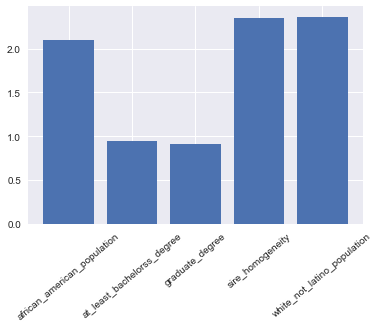

In [26]:
coefs_size = abs(lm.coef_.reshape(-1))
labels = X_train.columns[sorted_importance_indicies.reshape(-1)[-5:]]
plt.bar(labels, coefs_size[sorted_importance_indicies.reshape(-1)[-5:]])
plt.xticks(rotation=40);

## Random Forest

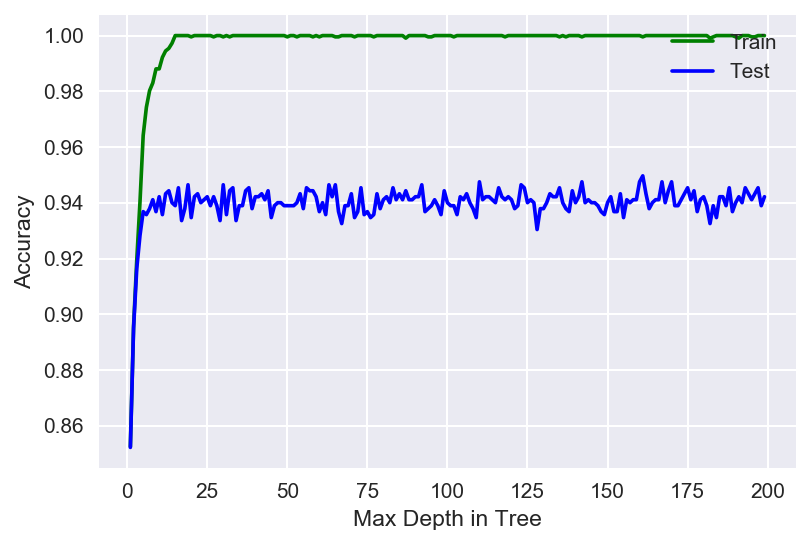

In [27]:
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X_train_scaled, y_train)
    train_score.append(dt.score(X_train_scaled, y_train))
    test_score.append(dt.score(X_test_scaled, y_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [28]:
rf2= RandomForestClassifier(n_estimators=50, max_depth=15)
rf2.fit(X_train_scaled, y_train)
rf2.score(X_test_scaled, y_test)

0.9379014989293362

In [29]:
y_train_predict_rf2 = rf2.predict(X_train_scaled)
y_test_predict_rf2 = rf2.predict(X_test_scaled)

In [30]:
print(classification_report(y_test, y_test_predict_rf2))

             precision    recall  f1-score   support

          0       0.84      0.75      0.79       146
          1       0.95      0.97      0.96       788

avg / total       0.94      0.94      0.94       934



In [31]:
sorted_importance_indicies = np.argsort(abs(rf2.feature_importances_))
rf2.feature_importances_.reshape(-1)[sorted_importance_indicies.reshape(-1)]
sorted_importance_indicies.reshape(-1)[-5:]

array([9, 3, 7, 2, 6])

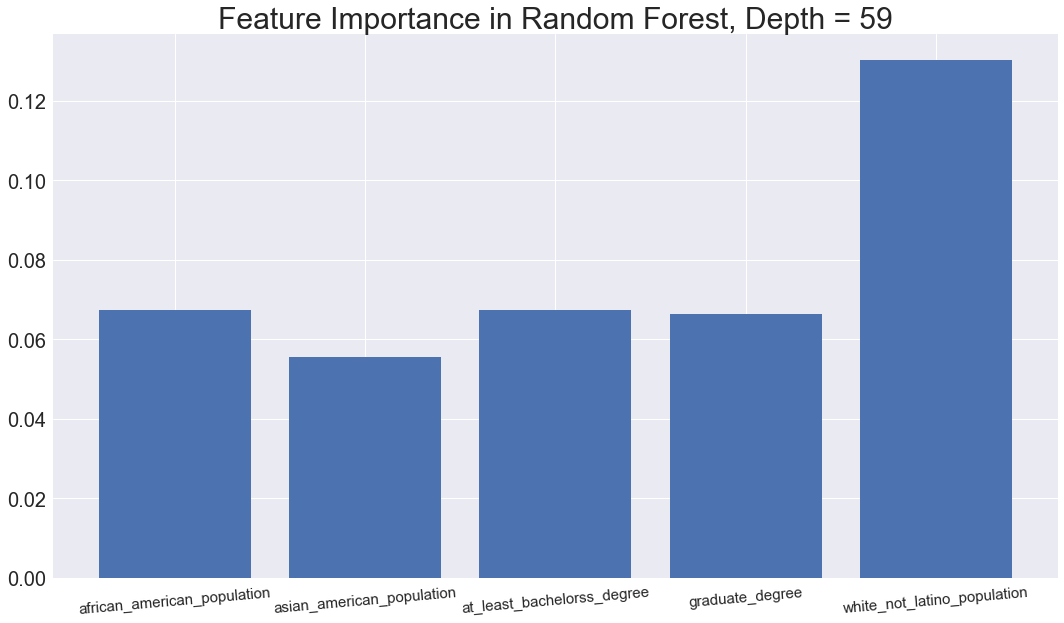

In [32]:
plt.figure(figsize=(18,10))
plt.title("Feature Importance in Random Forest, Depth = 59",fontsize=30)
coefs_size = abs(rf2.feature_importances_.reshape(-1))
labels = X_train.columns[sorted_importance_indicies.reshape(-1)[-5:]]
plt.bar(labels, coefs_size[sorted_importance_indicies.reshape(-1)[-5:]])
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xticks(rotation=5);

In [33]:
feature_viewer={}
for col, score in zip(df.iloc[:,1:44].columns, rf2.feature_importances_):
    feature_viewer[col] = score
pd.Series(feature_viewer)

adult_obesity                                                 0.032570
adult_smoking                                                 0.011398
adults_65_and_older_living_in_poverty                         0.011034
african_american_population                                   0.067241
asian_american_population                                     0.055539
at_least_bachelorss_degree                                    0.067256
at_least_high_school_diploma                                  0.009147
child_poverty_living_in_families_below_the_poverty_line       0.010532
children_in_single_parent_households                          0.030148
children_under_6_living_in_poverty                            0.008840
construction_extraction_maintenance_and_repair_occupations    0.025771
diabetes                                                      0.029166
farming_fishing_and_forestry_occupations                      0.009981
gini_coefficient                                              0.018776
gradua

## RBF Kernel

In [34]:
tbf_params = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4], 'C':[70, 75, 80, 90]}]
rbf1 = GridSearchCV(SVC(), tbf_params, cv=10, scoring = "roc_auc")
rbf1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001], 'C': [70, 75, 80, 90]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
rbf1.best_estimator_

SVC(C=80, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
rbf1.best_params_

{'C': 80, 'gamma': 0.001, 'kernel': 'rbf'}

In [37]:
y_train_predict_rbf1 = rbf1.predict(X_train_scaled)
y_test_predict_rbf1 = rbf1.predict(X_test_scaled)

In [38]:
print(classification_report(y_test, y_test_predict_rbf1))

             precision    recall  f1-score   support

          0       0.89      0.75      0.82       146
          1       0.96      0.98      0.97       788

avg / total       0.95      0.95      0.95       934



## Polynomial SVC

In [39]:
poly_params = [{'kernel': ['poly'], 'gamma': [1e-2, 1e-3, 1e-4], 'C':[3300,3400, 3500, 3600]}]
poly1 = GridSearchCV(SVC(), poly_params, cv=10, scoring = "roc_auc")
poly1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['poly'], 'gamma': [0.01, 0.001, 0.0001], 'C': [3300, 3400, 3500, 3600]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
poly1.best_estimator_

SVC(C=3600, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
poly1.best_params_

{'C': 3600, 'gamma': 0.001, 'kernel': 'poly'}

In [42]:
y_train_predict_poly1 = poly1.predict(X_train_scaled)
y_test_predict_poly1 = poly1.predict(X_test_scaled)

In [43]:
print(classification_report(y_test, y_test_predict_poly1))

             precision    recall  f1-score   support

          0       0.95      0.61      0.74       146
          1       0.93      0.99      0.96       788

avg / total       0.93      0.93      0.93       934



## Gaussian 

In [44]:
gs = naive_bayes.GaussianNB()
gs.fit(X_train_scaled, y_train)

GaussianNB(priors=None)

In [45]:
y_train_predict_gs = gs.predict(X_train_scaled)
y_test_predict_gs = gs.predict(X_test_scaled)

In [46]:
print(classification_report(y_test, y_test_predict_gs))

             precision    recall  f1-score   support

          0       0.60      0.79      0.69       146
          1       0.96      0.90      0.93       788

avg / total       0.90      0.89      0.89       934



## Pickle the models

In [57]:
pickle.dump(knn, open('pickles/knn.pkl','wb'))

In [58]:
pickle.dump(knn2, open('pickles/knn2.pkl','wb'))

In [59]:
pickle.dump(knn3, open('pickles/knn3.pkl','wb'))

In [60]:
pickle.dump(lm, open('pickles/lm.pkl','wb'))

In [61]:
pickle.dump(lm0, open('pickles/lm0.pkl','wb'))

In [62]:
pickle.dump(lm2, open('pickles/lm2.pkl','wb'))

In [67]:
pickle.dump(rf2, open('pickles/rf2.pkl','wb'))

In [68]:
pickle.dump(rbf1, open('pickles/rbf1.pkl','wb'))

In [74]:
pickle.dump(poly1, open('pickles/poly1.pkl','wb'))

In [78]:
pickle.dump(gs, open('pickles/gs.pkl','wb'))